# COMP5310: Assignment 1


## Research Question:


## Data Preprocessing

In [1]:
import pandas as pd
import mapping
import matplotlib.pyplot as plt
import seaborn as sns

file_paths = ['./data/ss15pusa.csv', './data/ss15pusb.csv']

## income, sex, disability, degree/study, class of worker, 
## can speak english, school, race, employments status of parents
## science or engineering degree, place of birth, occupation, age, marital status, industry
## hours worked, military status, time arrival at work, departure of work, language spoken at home, employed
columns = ['PINCP', 'SEX', 'DIS', 'FOD1P', 'COW', 'LANX', 'SCHL', 'RAC2P', 'ESP', 'SCIENGP', 'POBP', 'SOCP', 
           'AGEP', 'MAR', 'INDP', 'WKHP', 'MIL', 'JWAP', 'JWDP', 'LANP', 'ESR']
data_set_part1 = pd.read_csv(file_paths[0], usecols=columns)
data_set_part2 = pd.read_csv(file_paths[1], usecols=columns)

data_set = pd.concat([data_set_part1, data_set_part2], ignore_index=True, axis=0)

data_set['SEX'] = data_set['SEX'].map(mapping.sex_mapping)
data_set['DIS'] = data_set['DIS'].map(mapping.disability_mapping)
data_set['COW'] = data_set['COW'].map(mapping.worker_class_mapping)
data_set['FOD1P'] = data_set['FOD1P'].map(mapping.degree_field_mapping)
data_set['SCIENGP'] = data_set['SCIENGP'].map(mapping.is_STEM_field_mapping)
data_set['RAC2P'] = data_set['RAC2P'].map(mapping.ethnicity_mapping)
data_set['JWAP'] = data_set['JWAP'].map(mapping.arrival_hours_mapping)
data_set['JWDP'] = data_set['JWDP'].map(mapping.departure_hours_mappping)

column_name_changes = {
    'PINCP': 'Income',
    'SEX': 'Sex',
    'DIS': 'Disability',
    'FOD1P': 'Degree',
    'COW': 'Class of Worker',
    'SCHL': 'Education',
    'RAC2P': 'Race',
    'ESP': 'English Level',
    'SCIENGP': 'Science or Engineering Degree',
    'POBP': 'Place of Birth',
    'SOCP': 'Occupation',
    'AGEP': 'Age',
    'LANX': 'Can speak another language other than English',
    'MAR': 'Marital Status',
    'INDP': 'Industry',
    'WKHP': 'Hours Worked',
    'MIL': 'Military Status',
    'JWAP': 'Time of Arrival at Work',
    'JWDP': 'Time of Departure from Work',
    'LANP': 'Language Spoken at Home',
    'ESR': 'Is Employed'
}

data_set.rename(columns=column_name_changes, inplace=True)
print(data_set)


         Age                                    Class of Worker  \
0         56  Self-employed in own not incorporated business...   
1         61                                                NaN   
2          8                                                NaN   
3         61  Employee of a private for-profit company or bu...   
4         52                                                NaN   
...      ...                                                ...   
3147000    8                                                NaN   
3147001    5                                                NaN   
3147002   60     Local government employee (city, county, etc.)   
3147003   83                                                NaN   
3147004   37  Employee of a private for-profit company or bu...   

         Can speak another language other than English  Marital Status  \
0                                                  2.0               1   
1                                              

### Filter Education Level to at least High School Completion

In [2]:
filtered_data_set = data_set.loc[data_set['Education'] >= 16]

print(filtered_data_set)

         Age                                    Class of Worker  \
1         61                                                NaN   
3         61  Employee of a private for-profit company or bu...   
5         84                                                NaN   
6         53  Self-employed in own incorporated business, pr...   
7         53  Employee of a private for-profit company or bu...   
...      ...                                                ...   
3146996   40  Self-employed in own not incorporated business...   
3146997   41  Self-employed in own not incorporated business...   
3147002   60     Local government employee (city, county, etc.)   
3147003   83                                                NaN   
3147004   37  Employee of a private for-profit company or bu...   

         Can speak another language other than English  Marital Status  \
1                                                  2.0               1   
3                                              

### Identifying Null values on Occupation, Degree and Education

In [33]:
null_count_occupation= filtered_data_set['Occupation'].isna().sum()
null_count_degree = filtered_data_set['Degree'].isna().sum()
null_count_education = filtered_data_set['Education'].isna().sum()
print("Number of NaN values in 'Occupation' column: ", null_count_occupation)
print("Number of NaN values in 'Degree' column: ", null_count_degree)
print("Number of NaN values in 'Education' column: ", null_count_education)

Number of NaN values in 'Occupation' column:  522458
Number of NaN values in 'Degree' column:  1470144
Number of NaN values in 'Education' column:  0


### Dropping rows containing Null values in Occupation

In [4]:
dataset_cleaned = filtered_data_set.dropna(subset=['Occupation'])
print(dataset_cleaned)

         Age                                    Class of Worker  \
3         61  Employee of a private for-profit company or bu...   
6         53  Self-employed in own incorporated business, pr...   
7         53  Employee of a private for-profit company or bu...   
12        53  Employee of a private for-profit company or bu...   
13        20  Employee of a private for-profit company or bu...   
...      ...                                                ...   
3146995   34  Employee of a private for-profit company or bu...   
3146996   40  Self-employed in own not incorporated business...   
3146997   41  Self-employed in own not incorporated business...   
3147002   60     Local government employee (city, county, etc.)   
3147004   37  Employee of a private for-profit company or bu...   

         Can speak another language other than English  Marital Status  \
3                                                  2.0               3   
6                                              

### Filling in NaN values in Degree Column if we know they don't have a degree

In [5]:
condition = (dataset_cleaned['Education'] >= 16) & (dataset_cleaned['Education'] < 20)
dataset_cleaned.loc[condition, 'Degree'] = dataset_cleaned.loc[condition, 'Degree'].fillna('NO DEGREE')

print(dataset_cleaned)

         Age                                    Class of Worker  \
3         61  Employee of a private for-profit company or bu...   
6         53  Self-employed in own incorporated business, pr...   
7         53  Employee of a private for-profit company or bu...   
12        53  Employee of a private for-profit company or bu...   
13        20  Employee of a private for-profit company or bu...   
...      ...                                                ...   
3146995   34  Employee of a private for-profit company or bu...   
3146996   40  Self-employed in own not incorporated business...   
3146997   41  Self-employed in own not incorporated business...   
3147002   60     Local government employee (city, county, etc.)   
3147004   37  Employee of a private for-profit company or bu...   

         Can speak another language other than English  Marital Status  \
3                                                  2.0               3   
6                                              

### Filling in NaN values in Degree and If they do Science or Engineering Degree Column

In [6]:
condition = dataset_cleaned['Education'] == 20
hasScienceOrEngineeringDegree = (dataset_cleaned['Education'] >= 18) & (dataset_cleaned['Education'] <= 20)
dataset_cleaned.loc[condition, 'Degree'] = dataset_cleaned.loc[condition, 'Degree'].fillna('UNKNOWN')
dataset_cleaned.loc[hasScienceOrEngineeringDegree, 'Science or Engineering Degree'] = dataset_cleaned.loc[hasScienceOrEngineeringDegree, 'Science or Engineering Degree'].fillna('Unknown')
print(dataset_cleaned)

## dataset_cleaned = dataset_cleaned.drop(columns=['Language Spoken at Home'])

         Age                                    Class of Worker  \
3         61  Employee of a private for-profit company or bu...   
6         53  Self-employed in own incorporated business, pr...   
7         53  Employee of a private for-profit company or bu...   
12        53  Employee of a private for-profit company or bu...   
13        20  Employee of a private for-profit company or bu...   
...      ...                                                ...   
3146995   34  Employee of a private for-profit company or bu...   
3146996   40  Self-employed in own not incorporated business...   
3146997   41  Self-employed in own not incorporated business...   
3147002   60     Local government employee (city, county, etc.)   
3147004   37  Employee of a private for-profit company or bu...   

         Can speak another language other than English  Marital Status  \
3                                                  2.0               3   
6                                              

### Identifying Null values on Hours Worked

In [7]:
null_count_hours_worked = dataset_cleaned['Hours Worked'].isna().sum()
print(null_count_hours_worked)

204558


### Drop NaN values on Hours worked

In [8]:
columns_to_check = ['Time of Arrival at Work', 'Time of Departure from Work']
hasTimeArrivalAtWorkOrDeparture = dataset_cleaned[columns_to_check].notna().all(axis=1)

dataset_cleaned = dataset_cleaned[hasTimeArrivalAtWorkOrDeparture]

dataset_cleaned = dataset_cleaned.dropna(subset=['Hours Worked'])

print(dataset_cleaned)

         Age                                    Class of Worker  \
3         61  Employee of a private for-profit company or bu...   
6         53  Self-employed in own incorporated business, pr...   
7         53  Employee of a private for-profit company or bu...   
12        53  Employee of a private for-profit company or bu...   
13        20  Employee of a private for-profit company or bu...   
...      ...                                                ...   
3146990   39                          State government employee   
3146994   53                          State government employee   
3146996   40  Self-employed in own not incorporated business...   
3146997   41  Self-employed in own not incorporated business...   
3147004   37  Employee of a private for-profit company or bu...   

         Can speak another language other than English  Marital Status  \
3                                                  2.0               3   
6                                              

## Data Exploration

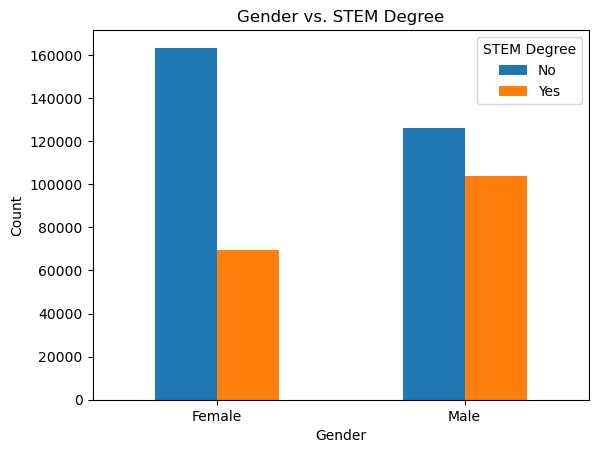

In [9]:
dataset_cleaned = dataset_cleaned.query("`Science or Engineering Degree` != 'Unknown'")
grouped_data = dataset_cleaned.groupby(['Sex', 'Science or Engineering Degree']).size().unstack(fill_value=0)

ax = grouped_data.plot(kind='bar', stacked=False)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs. STEM Degree')
plt.xticks(rotation=0)
plt.legend(title='STEM Degree')
plt.show()

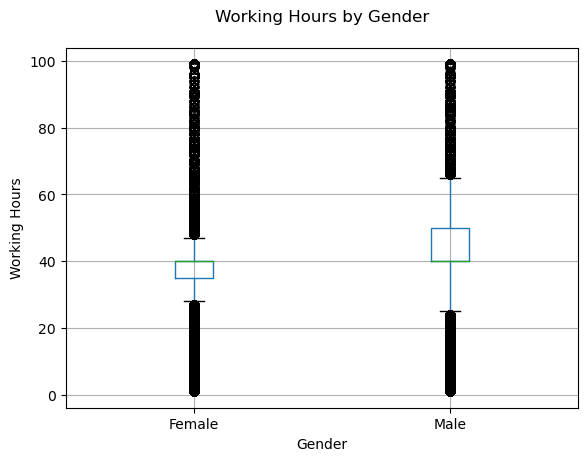

In [10]:
ax = dataset_cleaned.boxplot(column='Hours Worked', by='Sex')
plt.suptitle('Working Hours by Gender')
plt.xlabel('Gender')
plt.ylabel('Working Hours')
plt.xticks(rotation=0)
plt.title('')
plt.show()

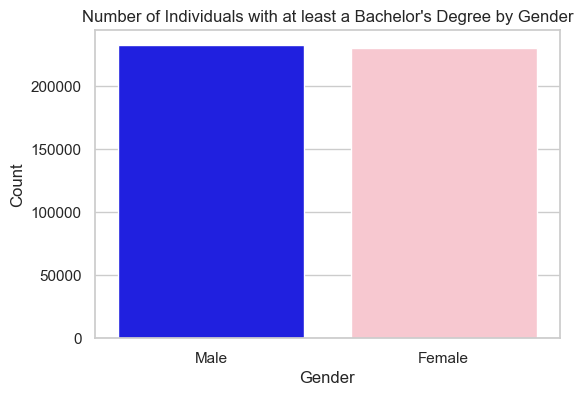

In [28]:
valid_education = dataset_cleaned[dataset_cleaned['Education'] >= 21]

education_counts = valid_education['Sex'].value_counts().reset_index()
education_counts.columns = ['Sex', 'COUNT']


# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(data=education_counts, x='Sex', y='COUNT', palette=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Number of Individuals with at least a Bachelor's Degree by Gender")
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

0.5030313771854554
0.49696862281454457


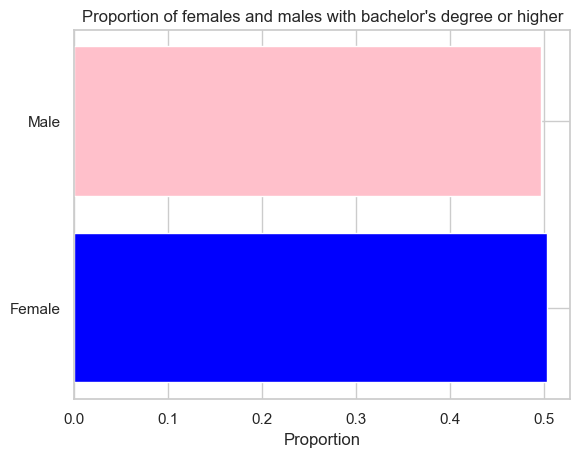

In [91]:
bachelors_or_higher = dataset_cleaned[dataset_cleaned['Education'] >= 21]

# Calculate Ratios
proportion_female = bachelors_or_higher[bachelors_or_higher['Sex'] == 'Female'].shape[0] / bachelors_or_higher.shape[0]
proportion_male = bachelors_or_higher[bachelors_or_higher['Sex'] == 'Male'].shape[0] / bachelors_or_higher.shape[0]
print(proportion_female)
print(proportion_male)
fig, ax = plt.subplots()
ax.barh(['Female', 'Male'], [proportion_female, proportion_male], color=['blue', 'pink'])
ax.set_xlabel('Proportion')
ax.set_title('Proportion of females and males with bachelor\'s degree or higher')
plt.show()